In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sympify, lambdify

class ExpressionCalculator:
    precedence = {"(": 1, ")": 1, "^": 2, "*" : 3, "×" : 3, "/": 3, "+": 4, "-":4 ,"−": 4}

    @classmethod
    def infix2postfix(cls, infix):
        stack = []
        postfix = []

        for element in infix:
            if (element[0] == "-" or element[0] == "−") and element[1:].isdigit():
                postfix.append(element)
                print(element[1:])


            elif element.isalnum():
                # alphabet letter (a-z) and numbers (0-9)
                postfix.append(element)



            elif element == '(':
                stack.append(element)
            elif element == ')':
                while stack and stack[-1] != '(':
                    postfix.append(stack.pop())
                if not stack:
                    raise ValueError("Mismatched parentheses in expression")
                stack.pop()  # Remove ( from the stack
            else:
                if stack and not cls.precedence.get(stack[-1]) == 1:
                    while (stack and cls.precedence.get(element, 0) <= cls.precedence.get(stack[-1], 0)):
                        # Send element as a key, if not found, return 0
                        postfix.append(stack.pop())
                stack.append(element)

        # Pop any remaining operators from the stack
        while stack:
            if stack[-1] == '(' or stack[-1] == ')':
                raise ValueError("Mismatched parentheses in expression")
            postfix.append(stack.pop())

        return ' '.join(postfix)

    @classmethod
    def infix2prefix(cls, infix):
        reversed_infix = []
        for element in reversed(infix):
            if element == '(':
                reversed_infix.append(')')
            elif element == ')':
                reversed_infix.append('(')
            else:
                reversed_infix.append(element)

        reversed_postfix = cls.infix2postfix(reversed_infix)
        prefix = reversed_postfix.split()[::-1]
        return ' '.join(prefix)
    
    @staticmethod
    def evaluate_postfix(postfix):
        stack = []

        for element in postfix:
            if element.isdigit() or (element.lstrip("-").isdigit()):  # Check if it's a number
                stack.append(int(element))
            else:
                if len(stack) < 2:
                    raise ValueError("Invalid postfix expression")
                
                # Pop the top two elements
                b = stack.pop()
                a = stack.pop()

                # Perform the operation
                if element == '+':
                    stack.append(a + b)
                elif element == '-' or element == '-':
                    stack.append(a - b)
                elif element == '*' or element == '×':
                    stack.append(a * b)
                elif element == '/':
                    if b == 0:
                        raise ZeroDivisionError("Division by zero")
                    stack.append(a / b)
                elif element == '^':
                    stack.append(a ** b)
                else:
                    raise ValueError(f"Unknown operator: {element}")

        if len(stack) != 1:
            raise ValueError("Invalid postfix expression")
        return stack[0]
    
    @classmethod
    def string_to_function(self,input_str):
    # Define the function using eval to compute the expression
        def f(x):
            return eval(input_str)
        return f
    @staticmethod
    def process_and_plot(expression):

        # Define the range for x
        x = np.linspace(-10, 10, 500)

        # Define the function
        func = ExpressionCalculator.string_to_function(expression)
        y = func(x)
        # Create the plot
        plt.plot(x, y, label="y = 2x²")
        plt.title("Plot of y = 2x²")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.axhline(0, color='black',linewidth=0.5)
        plt.axvline(0, color='black',linewidth=0.5)
        plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
        plt.legend()
        plt.show()

In [2]:
calc = ExpressionCalculator()
infix_expression = "( 5 + 3 ) * ( -8 - 6 )".split()
try:
    postfix_expression = calc.infix2postfix(infix_expression)
    print("Postfix:", postfix_expression)
except ValueError as e:
    print("Error:", e)

8
Postfix: 5 3 + -8 6 - *


In [3]:
calc = ExpressionCalculator()
infix_expression = "( 5 + 3 ) * ( -8 − 6 )".split()
try:
    prefix_expression = calc.infix2prefix(infix_expression)
    print("Postfix:", prefix_expression)
except ValueError as e:
    print("Error:", e)

8
Postfix: * + 5 3 − -8 6


In [4]:
calc = ExpressionCalculator()
postfix_expression = "5 3 + 8 6 - *".split()
print(postfix_expression)
try:
    result = calc.evaluate_postfix(postfix_expression)
    print("Result:", result)
except ValueError as e:
    print("Error:", e)

['5', '3', '+', '8', '6', '-', '*']
Result: 16


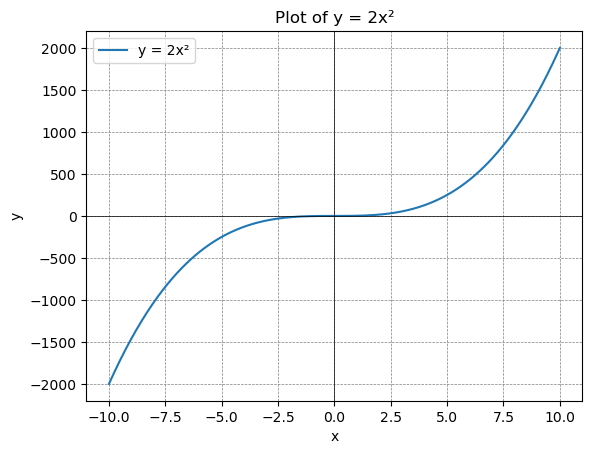

In [8]:
calc = ExpressionCalculator()
calc.process_and_plot("2 * x**3")